In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
games = pd.read_csv("game.csv")
players = pd.read_csv("player_info.csv")
#game_plays = pd.read_csv("game_plays.csv")
player_plays = pd.read_csv("game_plays_players.csv")
teams = pd.read_csv("team_info.csv")
game_plays = pd.read_csv("game.csv")

In [3]:
points_players = pd.read_csv("points_counts_names.csv", engine='python')

In [4]:
all_goals = pd.read_csv("points_only.csv", engine = 'python')

for i in range(0, len(all_goals.period)):
    if(all_goals.iloc[i,:].period > 3):
        all_goals.period[i] = 4
        


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [5]:
max(all_goals.period)

4

In [6]:

all_shots = pd.read_csv("shots_only.csv", engine = 'python')

In [7]:
all_shots = pd.read_csv("shots_only.csv", engine = 'python')

for i in range(0, len(all_shots.period)):
    if(all_shots.iloc[i,:].period > 3):
        all_shots.period[i] = 4
        

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [8]:
crosby_info = players[players['lastName'] == "Crosby"]
crosby_id = crosby_info.player_id
mcDavid_id = players[players['lastName'] == "McDavid"].player_id
eakin_id = players[players['lastName'] == "Eakin"].player_id
tierney_id = players[players['lastName'] == "Tierney"].player_id

ovechkin_id = players[players['lastName'] == "Ovechkin"].player_id
hall_id = players[(players['lastName'] == "Hall") & (players['firstName'] == "Taylor")].player_id
pouliot_id = players[(players['lastName'] == "Pouliot") & (players['firstName'] == "Benoit")].player_id
hagelin_id = players[players['lastName'] == "Hagelin"].player_id

kane_id = players[(players['lastName'] == "Kane") & (players['firstName'] == "Patrick")].player_id
kucherov_id = players[players['lastName'] == "Kucherov"].player_id
ward_id = players[(players['lastName'] == "Ward") & (players['firstName'] == "Joel")].player_id
frolik_id = players[players['lastName'] == "Frolik"].player_id

karlsson_id = players[(players['lastName'] == "Karlsson") & (players['firstName'] == "Erik")].player_id
letang_id = players[players['lastName'] == "Letang"].player_id
girardi_id = players[players['lastName'] == "Girardi"].player_id
greene_id = players[(players['lastName'] == "Greene") & (players['firstName'] == "Andy")].player_id

In [9]:
crosby_plays = player_plays[player_plays['player_id'] == int(crosby_id)]
crosby_points = crosby_plays.merge(all_goals, on = "play_id", how = "inner")
crosby_goals = crosby_points[crosby_points['playerType'] == "Scorer"]
crosby_assists = crosby_points[crosby_points['playerType'] == "Assist"]
crosby_shots = crosby_plays.merge(all_shots, on = "play_id", how = "inner")
crosby_points_and_shots = pd.concat([crosby_points, crosby_shots])

crosby_points_and_shots = crosby_points_and_shots.merge(games,left_on = "game_id_x", right_on = "game_id", how = "inner"  )
crosby_points = crosby_points.merge(games, left_on = "game_id_x", right_on = "game_id", how = "inner")
crosby_goals = crosby_goals.merge(games, left_on = "game_id_x", right_on = "game_id", how = "inner")
crosby_points_and_shots['shot_flag'] = np.where(crosby_points_and_shots['event'] == "Shot", 0, 1)

crosby_goals_and_shots = pd.concat([crosby_goals, crosby_shots])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


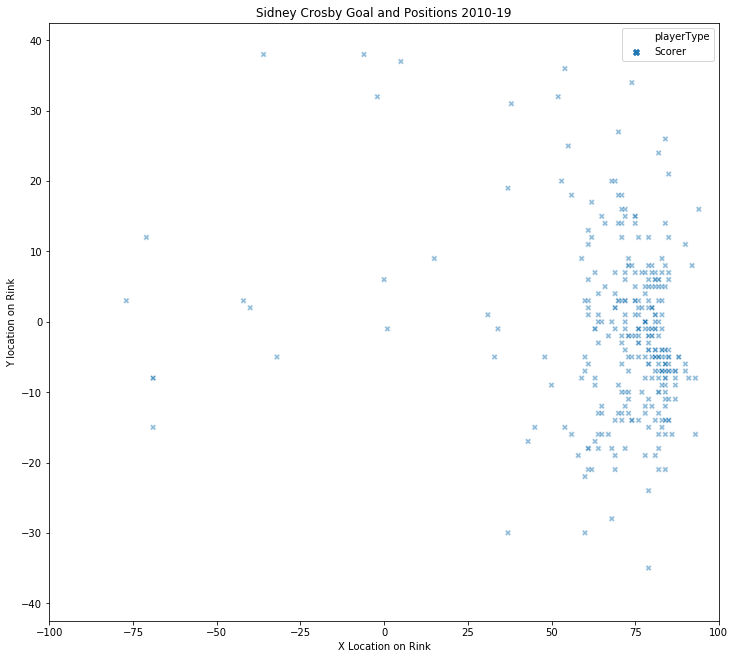

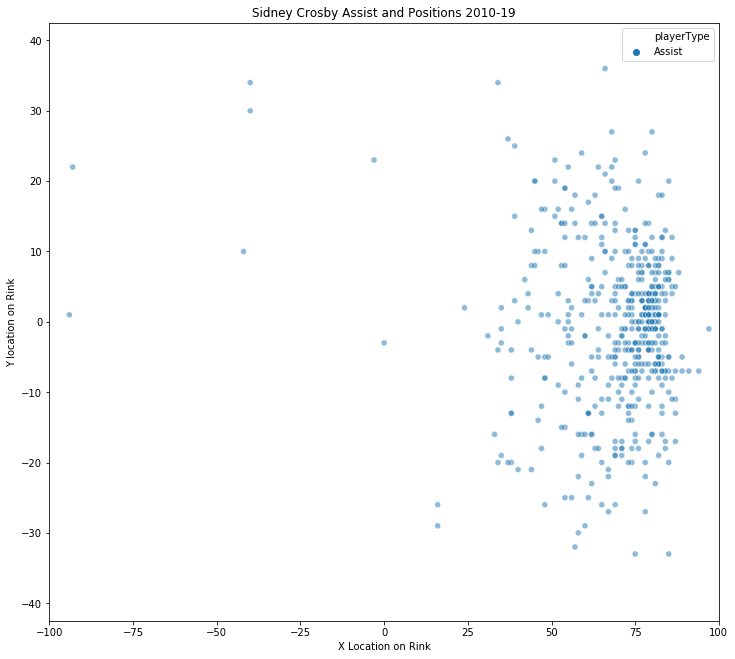

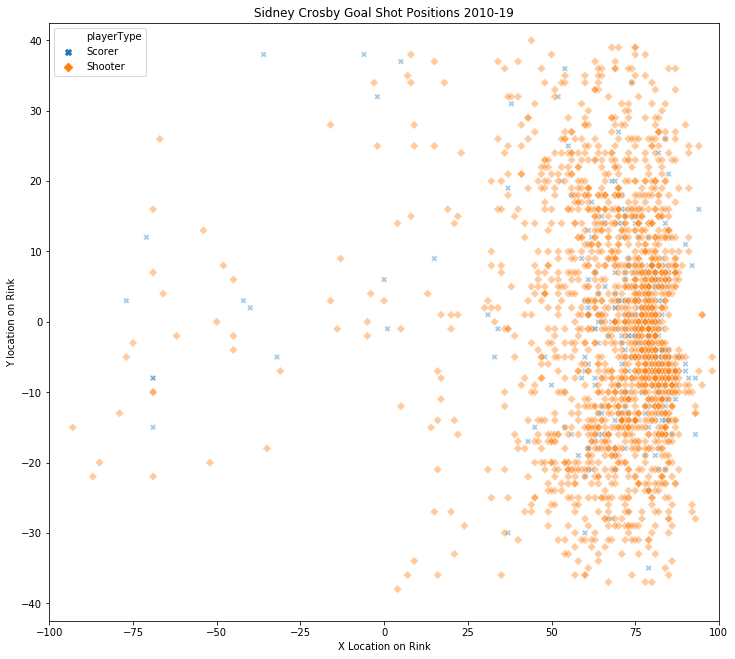

In [10]:
markers = {"Scorer" : "X", "Assist" : "o"}
plt.figure(figsize=[12, 11])
xdata = crosby_goals.st_x
ydata = crosby_goals.st_y
ax = sns.scatterplot(x = xdata, y = ydata, style = "playerType", markers = markers, hue = "playerType", alpha = 0.5, data = crosby_goals)
ax.set_xlim(-100,100)
ax.set_ylim(-42.5, 42.5)
# Set x/y limits and labels

plt.title("Sidney Crosby Goal and Positions 2010-19")
plt.xlabel("X Location on Rink")
plt.ylabel("Y location on Rink")
plt.show()


markers = {"Scorer" : "X", "Assist" : "o"}
plt.figure(figsize=[12, 11])
xdata = crosby_assists.st_x
ydata = crosby_assists.st_y
ax = sns.scatterplot(x = xdata, y = ydata, style = "playerType", markers = markers, hue = "playerType", alpha = 0.5, data = crosby_assists)
ax.set_xlim(-100,100)
ax.set_ylim(-42.5, 42.5)
# Set x/y limits and labels

plt.title("Sidney Crosby Assist and Positions 2010-19")
plt.xlabel("X Location on Rink")
plt.ylabel("Y location on Rink")
plt.show()

markers = {"Scorer" : "X", "Shooter": "D"}
plt.figure(figsize=[12, 11])
xdata = crosby_goals_and_shots.st_x
ydata = crosby_goals_and_shots.st_y
ax = sns.scatterplot(x = xdata, y = ydata, style = "playerType", markers = markers, hue = "playerType", alpha = 0.4, data = crosby_goals_and_shots)
ax.set_xlim(-100,100)
ax.set_ylim(-42.5, 42.5)
# Set x/y limits and labels

plt.title("Sidney Crosby Goal Shot Positions 2010-19")
plt.xlabel("X Location on Rink")
plt.ylabel("Y location on Rink")
plt.show()



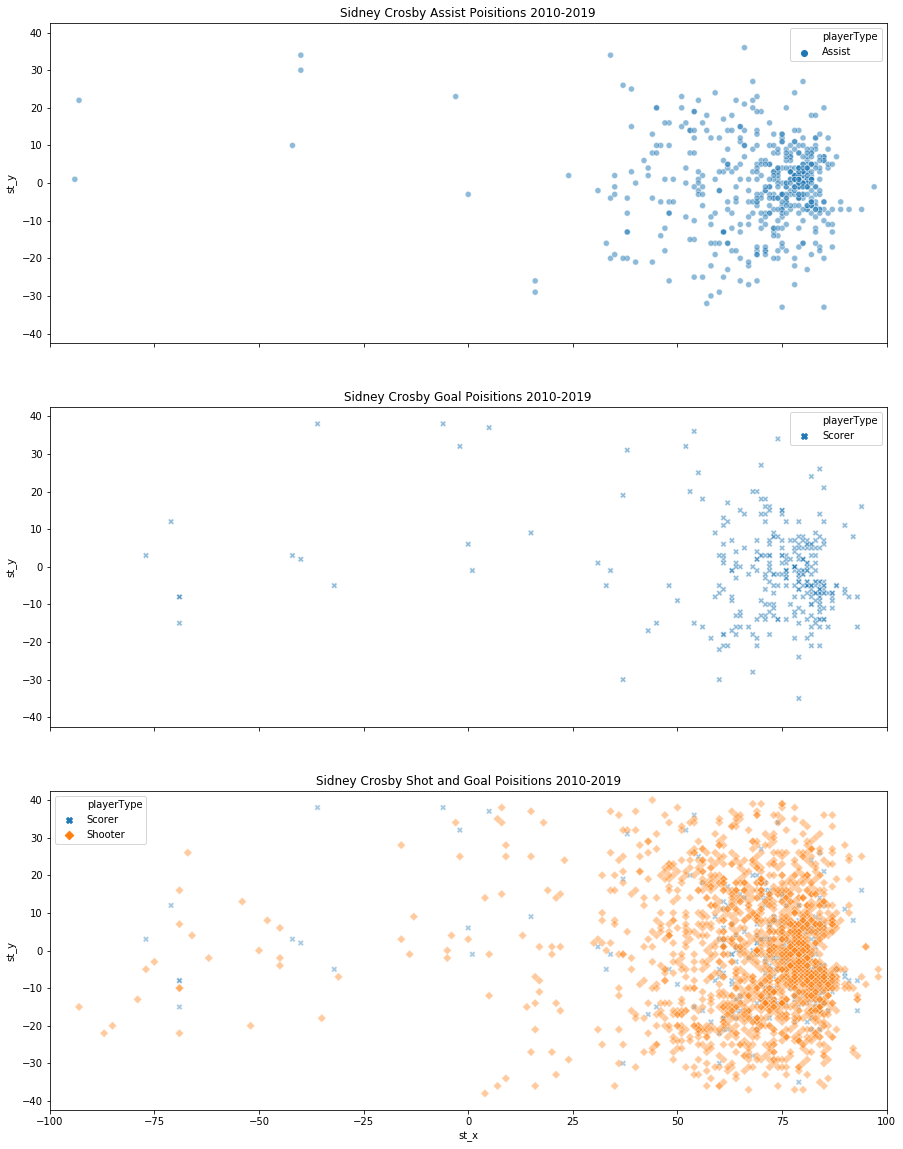

<Figure size 864x792 with 0 Axes>

In [11]:
f, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (15,20), sharex = True, sharey= True)
markers = {"Scorer" : "X", "Assist" : "o", "Shooter": "D"}
xdata = crosby_goals_and_shots.st_x
ydata = crosby_goals_and_shots.st_y
sns.scatterplot(x = xdata, y = ydata, style = "playerType", markers = markers, hue = "playerType", alpha = 0.4, data = crosby_goals_and_shots, ax = ax3)
ax3.set_xlim(-100,100)
ax3.set_ylim(-42.5, 42.5)
xdata = crosby_goals.st_x
ydata = crosby_goals.st_y
sns.scatterplot(x = xdata, y = ydata, style = "playerType", markers = markers, hue = "playerType", alpha = 0.5, data = crosby_goals, ax = ax2)

plt.figure(figsize=[12, 11])
xdata = crosby_assists.st_x
ydata = crosby_assists.st_y
ax = sns.scatterplot(x = xdata, y = ydata, style = "playerType", markers = markers, hue = "playerType", alpha = 0.5, data = crosby_assists, ax  = ax1)


ax1.title.set_text('Sidney Crosby Assist Poisitions 2010-2019')
ax2.title.set_text('Sidney Crosby Goal Poisitions 2010-2019')
ax3.title.set_text('Sidney Crosby Shot and Goal Poisitions 2010-2019')

In [12]:
crosby_pivot = pd.pivot_table(crosby_points_and_shots, values = ['shot_flag'], index = 'period', columns = 'secondaryType', fill_value = 0)
crosby_pivot

shot_flag                                                      \
secondaryType  Backhand Deflected Slap Shot Snap Shot    Tip-In Wrap-around   
period                                                                        
1              0.259542  0.375000  0.300000  0.320000  0.478261    0.400000   
2              0.195489  0.500000  0.254902  0.401198  0.414286    0.333333   
3              0.202020  0.444444  0.344086  0.325581  0.442857    0.222222   
4              0.346154  0.000000  0.538462  0.263158  0.750000    0.000000   

                          
secondaryType Wrist Shot  
period                    
1               0.285347  
2               0.288770  
3               0.316623  
4               0.291667

In [13]:
crosby_period_averages = crosby_pivot.iloc[0:3,].mean(axis = 1)
crosby_shot_averages = crosby_pivot.iloc[0:3,].mean(axis = 0)
print(crosby_period_averages)
print(crosby_shot_averages)

period
1    0.345450
2    0.341140
3    0.328262
dtype: float64
           secondaryType
shot_flag  Backhand         0.219017
           Deflected        0.439815
           Slap Shot        0.299663
           Snap Shot        0.348926
           Tip-In           0.445135
           Wrap-around      0.318519
           Wrist Shot       0.296913
dtype: float64


In [14]:
mcDavid_plays = player_plays[player_plays['player_id'] == int(mcDavid_id)]
mcDavid_points = mcDavid_plays.merge(all_goals, on = "play_id", how = "inner")
mcDavid_goals = mcDavid_points[mcDavid_points['playerType'] == "Scorer"]
mcDavid_assists = mcDavid_points[mcDavid_points['playerType'] == "Assist"]
mcDavid_shots = mcDavid_plays.merge(all_shots, on = "play_id", how = "inner")
mcDavid_points_and_shots = pd.concat([mcDavid_points, mcDavid_shots])

mcDavid_points_and_shots = mcDavid_points_and_shots.merge(games,left_on = "game_id_x", right_on = "game_id", how = "inner"  )
mcDavid_points = mcDavid_points.merge(games, left_on = "game_id_x", right_on = "game_id", how = "inner")
mcDavid_goals = mcDavid_goals.merge(games, left_on = "game_id_x", right_on = "game_id", how = "inner")
mcDavid_points_and_shots['shot_flag'] = np.where(mcDavid_points_and_shots['event'] == "Shot", 0, 1)

mcDavid_goals_and_shots = pd.concat([mcDavid_goals, mcDavid_shots], sort = False)


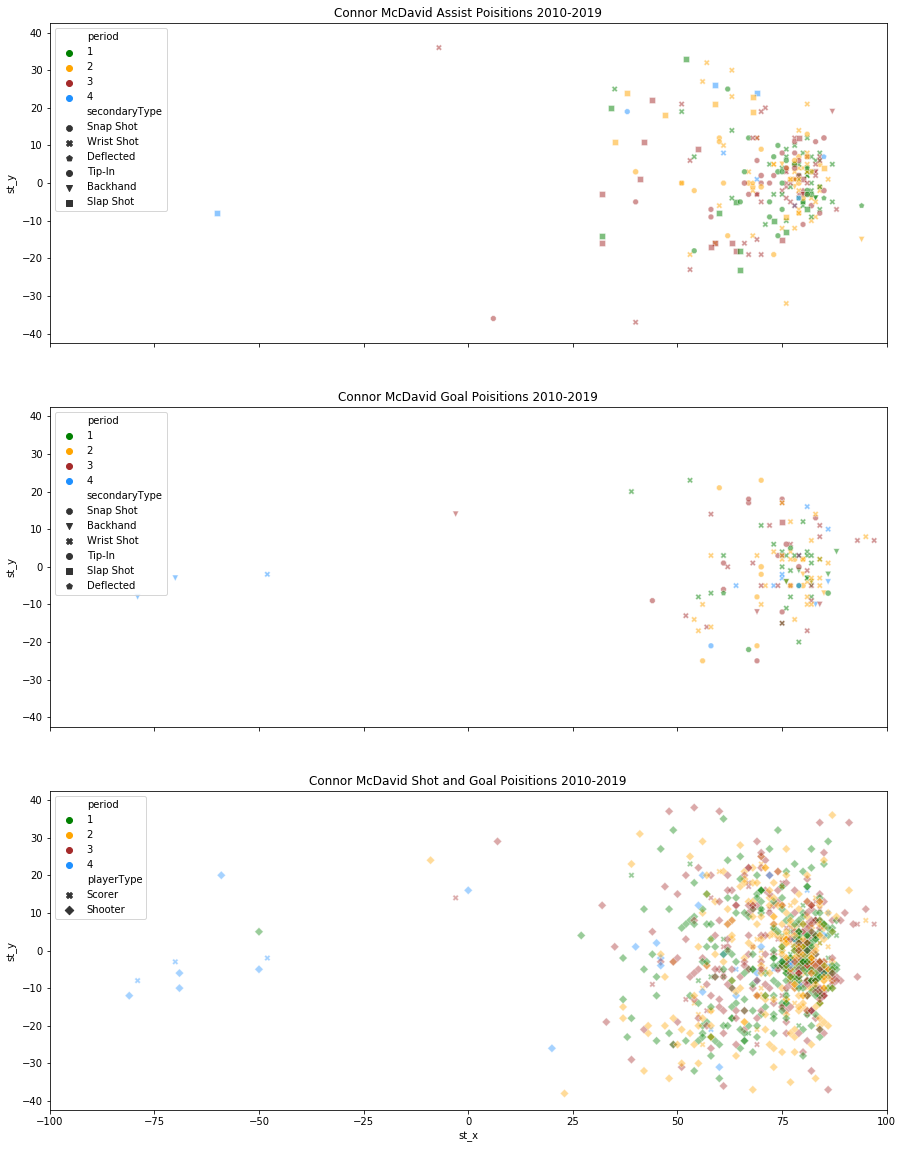

<Figure size 864x792 with 0 Axes>

In [15]:
f, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (15,20), sharex = True, sharey= True)
markers = {"Scorer" : "X", "Assist" : "o", "Shooter": "D"}
xdata = mcDavid_goals_and_shots.st_x
ydata = mcDavid_goals_and_shots.st_y
sns.scatterplot(x = xdata, y = ydata, style = "playerType", markers = markers, hue = "period", alpha = 0.4, data = mcDavid_goals_and_shots, ax = ax3, palette= ['green','orange','brown','dodgerblue'])
ax3.set_xlim(-100,100)
ax3.set_ylim(-42.5, 42.5)


markers = {"Backhand": "v", "Deflected": "p", "Slap Shot": "s", "Snap Shot": "8", "Tip-In": "o", "Wrap-around": "*", "Wrist Shot": "X"  }
xdata = mcDavid_goals.st_x
ydata = mcDavid_goals.st_y
sns.scatterplot(x = xdata, y = ydata, style = "secondaryType", markers = markers, hue = "period", alpha = 0.5, data = mcDavid_goals, ax = ax2, palette = ['green','orange','brown','dodgerblue'])

plt.figure(figsize=[12, 11])
xdata = mcDavid_assists.st_x
ydata = mcDavid_assists.st_y
ax = sns.scatterplot(x = xdata, y = ydata, style = "secondaryType", markers = markers, hue = "period", alpha = 0.5, data = mcDavid_assists, ax  = ax1, palette = ['green','orange','brown','dodgerblue'])


ax1.title.set_text('Connor McDavid Assist Poisitions 2010-2019')
ax2.title.set_text('Connor McDavid Goal Poisitions 2010-2019')
ax3.title.set_text('Connor McDavid Shot and Goal Poisitions 2010-2019')


In [16]:
mcDavid_pivot = pd.pivot_table(mcDavid_points_and_shots, values = ['shot_flag'], index = 'period', columns = 'secondaryType', fill_value = 0)
mcDavid_pivot


shot_flag                                                      \
secondaryType  Backhand Deflected Slap Shot Snap Shot    Tip-In Wrap-around   
period                                                                        
1              0.196429  0.571429  0.588235  0.333333  0.285714           0   
2              0.214286  0.250000  0.421053  0.365385  0.772727           0   
3              0.152174  0.600000  0.777778  0.435484  0.416667           0   
4              0.400000  1.000000  0.750000  0.800000  0.000000           0   

                          
secondaryType Wrist Shot  
period                    
1               0.303318  
2               0.305556  
3               0.295918  
4               0.342105

In [17]:
mcDavid_period_averages = mcDavid_pivot.iloc[0:3,].mean(axis = 1)
mcDavid_shot_averages = mcDavid_pivot.iloc[0:3,].mean(axis = 0)
print(mcDavid_period_averages)
print(mcDavid_shot_averages)


period
1    0.325494
2    0.332715
3    0.382574
dtype: float64
           secondaryType
shot_flag  Backhand         0.187629
           Deflected        0.473810
           Slap Shot        0.595689
           Snap Shot        0.378067
           Tip-In           0.491703
           Wrap-around      0.000000
           Wrist Shot       0.301597
dtype: float64


In [18]:
tierney_plays = player_plays[player_plays['player_id'] == int(tierney_id)]
tierney_points = tierney_plays.merge(all_goals, on = "play_id", how = "inner")
tierney_goals = tierney_points[tierney_points['playerType'] == "Scorer"]
tierney_assists = tierney_points[tierney_points['playerType'] == "Assist"]
tierney_shots = tierney_plays.merge(all_shots, on = "play_id", how = "inner")
tierney_points_and_shots = pd.concat([tierney_points, tierney_shots])

tierney_points_and_shots = tierney_points_and_shots.merge(games,left_on = "game_id_x", right_on = "game_id", how = "inner"  )
tierney_points = tierney_points.merge(games, left_on = "game_id_x", right_on = "game_id", how = "inner")
tierney_goals = tierney_goals.merge(games, left_on = "game_id_x", right_on = "game_id", how = "inner")
tierney_points_and_shots['shot_flag'] = np.where(tierney_points_and_shots['event'] == "Shot", 0, 1)

tierney_goals_and_shots = pd.concat([tierney_goals, tierney_shots], sort = False)


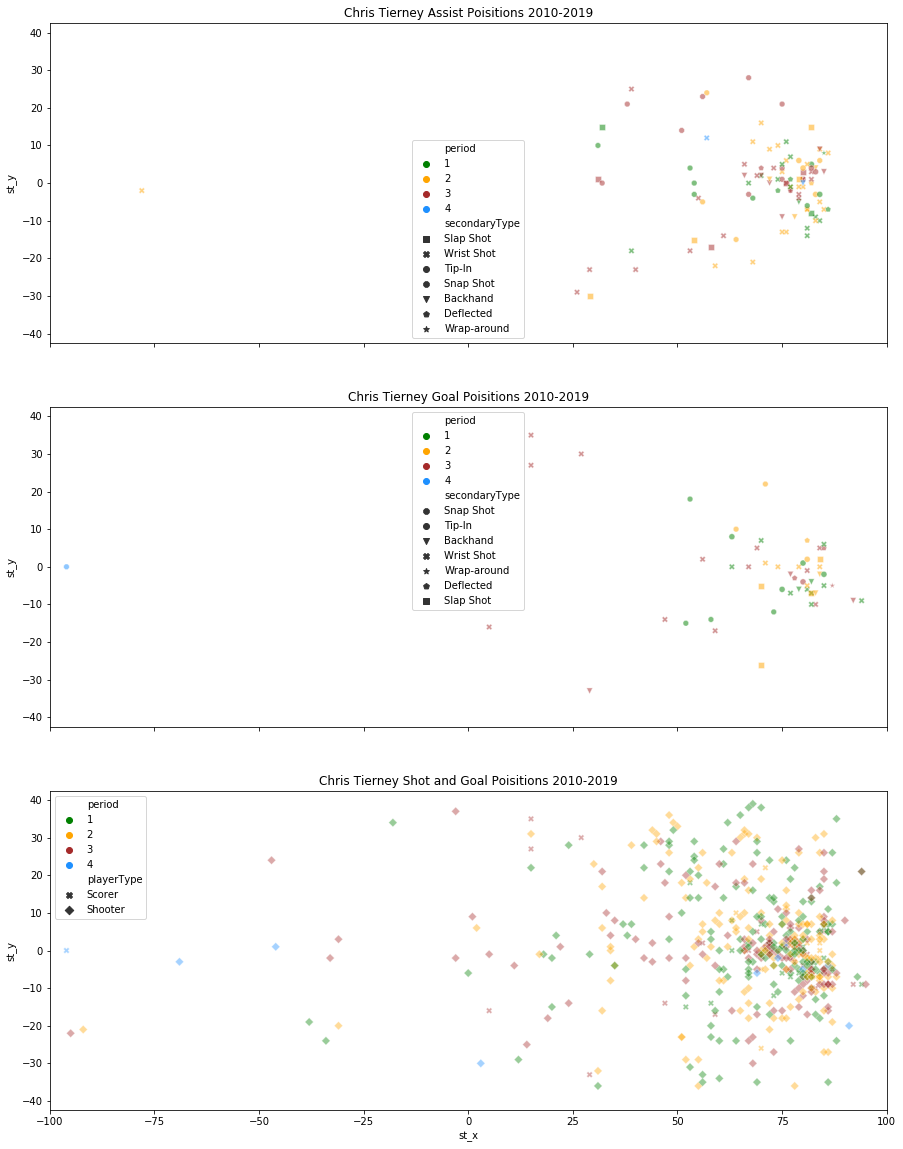

<Figure size 864x792 with 0 Axes>

In [19]:
f, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (15,20), sharex = True, sharey= True)
markers = {"Scorer" : "X", "Assist" : "o", "Shooter": "D"}
xdata = tierney_goals_and_shots.st_x
ydata = tierney_goals_and_shots.st_y
sns.scatterplot(x = xdata, y = ydata, style = "playerType", markers = markers, hue = "period", alpha = 0.4, data = tierney_goals_and_shots, ax = ax3, palette= ['green','orange','brown','dodgerblue'])
ax3.set_xlim(-100,100)
ax3.set_ylim(-42.5, 42.5)


markers = {"Backhand": "v", "Deflected": "p", "Slap Shot": "s", "Snap Shot": "8", "Tip-In": "o", "Wrap-around": "*", "Wrist Shot": "X"  }
xdata = tierney_goals.st_x
ydata = tierney_goals.st_y
sns.scatterplot(x = xdata, y = ydata, style = "secondaryType", markers = markers, hue = "period", alpha = 0.5, data = tierney_goals, ax = ax2, palette = ['green','orange','brown','dodgerblue'])

plt.figure(figsize=[12, 11])
xdata = tierney_assists.st_x
ydata = tierney_assists.st_y
ax = sns.scatterplot(x = xdata, y = ydata, style = "secondaryType", markers = markers, hue = "period", alpha = 0.5, data = tierney_assists, ax  = ax1, palette = ['green','orange','brown','dodgerblue'])


ax1.title.set_text('Chris Tierney Assist Poisitions 2010-2019')
ax2.title.set_text('Chris Tierney Goal Poisitions 2010-2019')
ax3.title.set_text('Chris Tierney Shot and Goal Poisitions 2010-2019')



In [20]:
tierney_pivot = pd.pivot_table(tierney_points_and_shots, values = ['shot_flag'], index = 'period', columns = 'secondaryType', fill_value = 0)
tierney_pivot


shot_flag                                                      \
secondaryType  Backhand Deflected Slap Shot Snap Shot    Tip-In Wrap-around   
period                                                                        
1              0.200000  0.333333  0.166667  0.400000  0.315789       0.200   
2              0.192308  0.600000  0.533333  0.214286  0.235294       0.000   
3              0.303030  0.500000  0.363636  0.600000  0.266667       0.125   
4              0.333333  0.000000  0.000000  1.000000  0.000000       0.000   

                          
secondaryType Wrist Shot  
period                    
1               0.179487  
2               0.247619  
3               0.280000  
4               0.125000

In [21]:
tierney_period_averages = tierney_pivot.iloc[0:3,].mean(axis = 1)
tierney_shot_averages = tierney_pivot.iloc[0:3,].mean(axis = 0)
print(tierney_period_averages)
print(tierney_shot_averages)


period
1    0.256468
2    0.288977
3    0.348333
dtype: float64
           secondaryType
shot_flag  Backhand         0.231779
           Deflected        0.477778
           Slap Shot        0.354545
           Snap Shot        0.404762
           Tip-In           0.272583
           Wrap-around      0.108333
           Wrist Shot       0.235702
dtype: float64


In [22]:
eakin_plays = player_plays[player_plays['player_id'] == int(eakin_id)]
eakin_points = eakin_plays.merge(all_goals, on = "play_id", how = "inner")
eakin_goals = eakin_points[eakin_points['playerType'] == "Scorer"]
eakin_assists = eakin_points[eakin_points['playerType'] == "Assist"]
eakin_shots = eakin_plays.merge(all_shots, on = "play_id", how = "inner")
eakin_points_and_shots = pd.concat([eakin_points, eakin_shots])

eakin_points_and_shots = eakin_points_and_shots.merge(games,left_on = "game_id_x", right_on = "game_id", how = "inner"  )
eakin_points = eakin_points.merge(games, left_on = "game_id_x", right_on = "game_id", how = "inner")
eakin_goals = eakin_goals.merge(games, left_on = "game_id_x", right_on = "game_id", how = "inner")
eakin_points_and_shots['shot_flag'] = np.where(eakin_points_and_shots['event'] == "Shot", 0, 1)

eakin_goals_and_shots = pd.concat([eakin_goals, eakin_shots], sort = False)


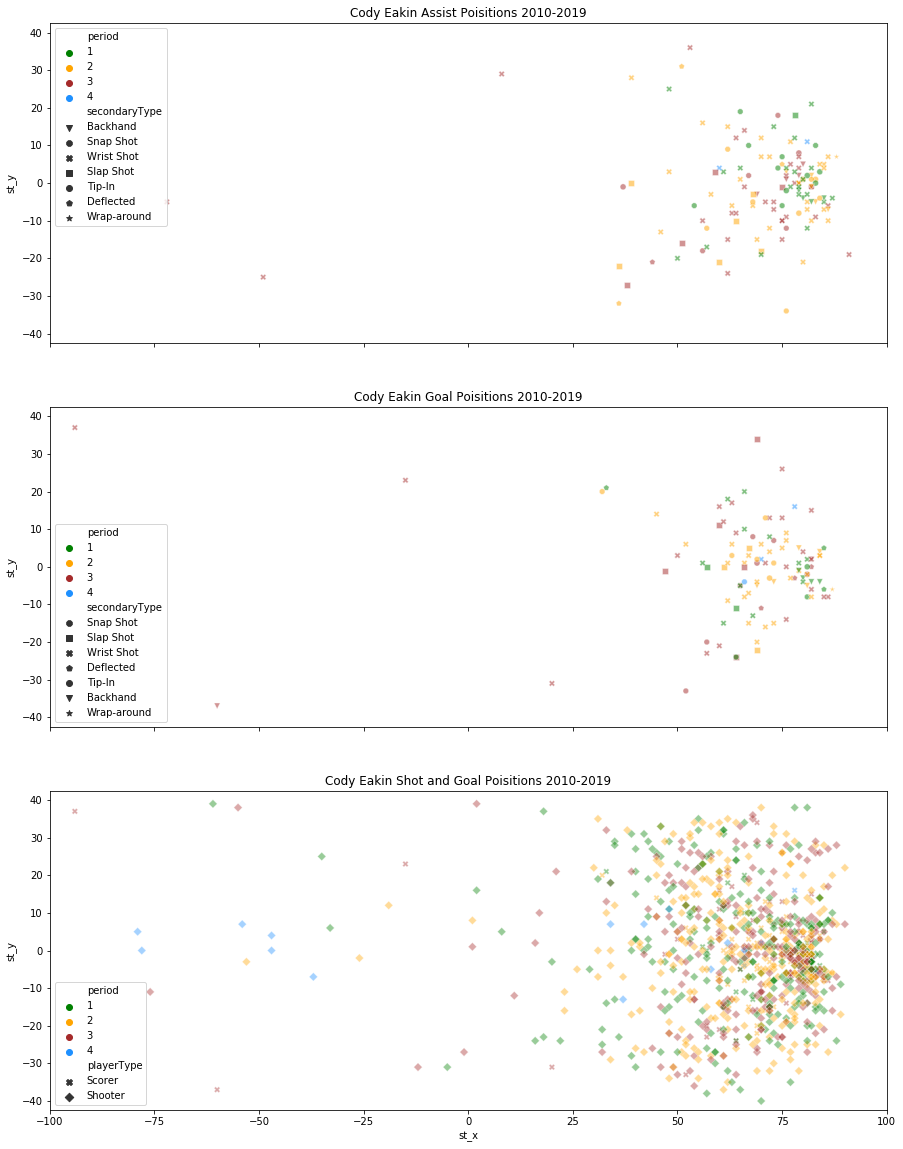

<Figure size 864x792 with 0 Axes>

In [23]:
f, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (15,20), sharex = True, sharey= True)
markers = {"Scorer" : "X", "Assist" : "o", "Shooter": "D"}
xdata = eakin_goals_and_shots.st_x
ydata = eakin_goals_and_shots.st_y
sns.scatterplot(x = xdata, y = ydata, style = "playerType", markers = markers, hue = "period", alpha = 0.4, data = eakin_goals_and_shots, ax = ax3, palette= ['green','orange','brown','dodgerblue'])
ax3.set_xlim(-100,100)
ax3.set_ylim(-42.5, 42.5)


markers = {"Backhand": "v", "Deflected": "p", "Slap Shot": "s", "Snap Shot": "8", "Tip-In": "o", "Wrap-around": "*", "Wrist Shot": "X"  }
xdata = eakin_goals.st_x
ydata = eakin_goals.st_y
sns.scatterplot(x = xdata, y = ydata, style = "secondaryType", markers = markers, hue = "period", alpha = 0.5, data = eakin_goals, ax = ax2, palette = ['green','orange','brown','dodgerblue'])

plt.figure(figsize=[12, 11])
xdata = eakin_assists.st_x
ydata = eakin_assists.st_y
ax = sns.scatterplot(x = xdata, y = ydata, style = "secondaryType", markers = markers, hue = "period", alpha = 0.5, data = eakin_assists, ax  = ax1, palette = ['green','orange','brown','dodgerblue'])


ax1.title.set_text('Cody Eakin Assist Poisitions 2010-2019')
ax2.title.set_text('Cody Eakin Goal Poisitions 2010-2019')
ax3.title.set_text('Cody Eakin Shot and Goal Poisitions 2010-2019')


In [24]:
eakin_pivot = pd.pivot_table(eakin_points_and_shots, values = ['shot_flag'], index = 'period', columns = 'secondaryType', fill_value = 0)
eakin_pivot


shot_flag                                                      \
secondaryType  Backhand Deflected Slap Shot Snap Shot    Tip-In Wrap-around   
period                                                                        
1              0.195122  0.250000  0.150000  0.236842  0.277778         0.0   
2              0.178571  0.272727  0.236842  0.244444  0.444444         0.5   
3              0.181818  0.500000  0.321429  0.236842  0.250000         0.0   
4              0.000000  0.000000  0.000000  0.333333  0.000000         0.0   

                          
secondaryType Wrist Shot  
period                    
1               0.181287  
2               0.232143  
3               0.272727  
4               0.285714

In [25]:
eakin_period_averages = eakin_pivot.iloc[0:3,].mean(axis = 1)
eakin_shot_averages = eakin_pivot.iloc[0:3,].mean(axis = 0)
print(eakin_period_averages)
print(eakin_shot_averages)


period
1    0.184433
2    0.301310
3    0.251831
dtype: float64
           secondaryType
shot_flag  Backhand         0.185171
           Deflected        0.340909
           Slap Shot        0.236090
           Snap Shot        0.239376
           Tip-In           0.324074
           Wrap-around      0.166667
           Wrist Shot       0.228719
dtype: float64


In [26]:
ovechkin_plays = player_plays[player_plays['player_id'] == int(ovechkin_id)]
ovechkin_points = ovechkin_plays.merge(all_goals, on = "play_id", how = "inner")
ovechkin_goals = ovechkin_points[ovechkin_points['playerType'] == "Scorer"]
ovechkin_assists = ovechkin_points[ovechkin_points['playerType'] == "Assist"]
ovechkin_shots = ovechkin_plays.merge(all_shots, on = "play_id", how = "inner")
ovechkin_points_and_shots = pd.concat([ovechkin_points, ovechkin_shots])

ovechkin_points_and_shots = ovechkin_points_and_shots.merge(games,left_on = "game_id_x", right_on = "game_id", how = "inner"  )
ovechkin_points = ovechkin_points.merge(games, left_on = "game_id_x", right_on = "game_id", how = "inner")
ovechkin_goals = ovechkin_goals.merge(games, left_on = "game_id_x", right_on = "game_id", how = "inner")
ovechkin_points_and_shots['shot_flag'] = np.where(ovechkin_points_and_shots['event'] == "Shot", 0, 1)

ovechkin_goals_and_shots = pd.concat([ovechkin_goals, ovechkin_shots], sort = False)


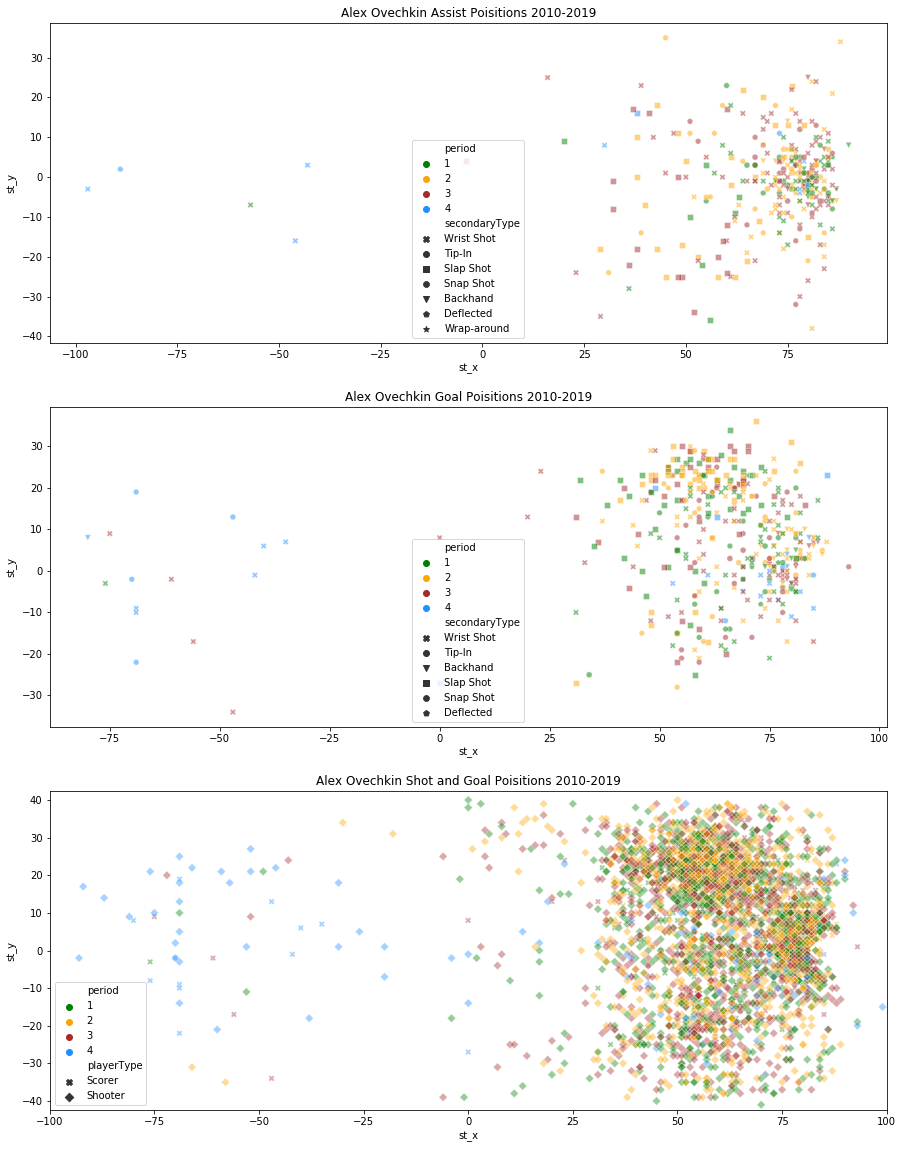

<Figure size 864x792 with 0 Axes>

In [27]:
f, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (15,20))
markers = {"Scorer" : "X", "Assist" : "o", "Shooter": "D"}
xdata = ovechkin_goals_and_shots.st_x
ydata = ovechkin_goals_and_shots.st_y
sns.scatterplot(x = xdata, y = ydata, style = "playerType", markers = markers, hue = "period", alpha = 0.4, data = ovechkin_goals_and_shots, ax = ax3, palette= ['green','orange','brown','dodgerblue'])
ax3.set_xlim(-100,100)
ax3.set_ylim(-42.5, 42.5)


markers = {"Backhand": "v", "Deflected": "p", "Slap Shot": "s", "Snap Shot": "8", "Tip-In": "o", "Wrap-around": "*", "Wrist Shot": "X"  }
xdata = ovechkin_goals.st_x
ydata = ovechkin_goals.st_y
sns.scatterplot(x = xdata, y = ydata, style = "secondaryType", markers = markers, hue = "period", alpha = 0.5, data = ovechkin_goals, ax = ax2, palette = ['green','orange','brown','dodgerblue'])

plt.figure(figsize=[12, 11])
xdata = ovechkin_assists.st_x
ydata = ovechkin_assists.st_y
ax = sns.scatterplot(x = xdata, y = ydata, style = "secondaryType", markers = markers, hue = "period", alpha = 0.5, data = ovechkin_assists, ax  = ax1, palette = ['green','orange','brown','dodgerblue'])


ax1.title.set_text('Alex Ovechkin Assist Poisitions 2010-2019')
ax2.title.set_text('Alex Ovechkin Goal Poisitions 2010-2019')
ax3.title.set_text('Alex Ovechkin Shot and Goal Poisitions 2010-2019')


In [28]:
ovechkin_pivot = pd.pivot_table(ovechkin_points_and_shots, values = ['shot_flag'], index = 'period', columns = 'secondaryType', fill_value = 0)
ovechkin_pivot


shot_flag                                                      \
secondaryType  Backhand Deflected Slap Shot Snap Shot    Tip-In Wrap-around   
period                                                                        
1              0.208955  0.363636  0.193309  0.124444  0.454545         0.2   
2              0.287356  0.666667  0.212766  0.162264  0.512821         0.0   
3              0.236111  0.125000  0.189781  0.170213  0.450000         0.0   
4              0.416667  0.000000  0.166667  0.263158  0.333333         0.0   

                          
secondaryType Wrist Shot  
period                    
1               0.148362  
2               0.189338  
3               0.231986  
4               0.261905

In [29]:
ovechkin_period_averages = ovechkin_pivot.iloc[0:3,].mean(axis = 1)
ovechkin_shot_averages = ovechkin_pivot.iloc[0:3,].mean(axis = 0)
print(ovechkin_period_averages)
print(ovechkin_shot_averages)


period
1    0.241893
2    0.290173
3    0.200442
dtype: float64
           secondaryType
shot_flag  Backhand         0.244141
           Deflected        0.385101
           Slap Shot        0.198619
           Snap Shot        0.152307
           Tip-In           0.472455
           Wrap-around      0.066667
           Wrist Shot       0.189895
dtype: float64


In [30]:
pouliot_plays = player_plays[player_plays['player_id'] == int(pouliot_id)]
pouliot_points = pouliot_plays.merge(all_goals, on = "play_id", how = "inner")
pouliot_goals = pouliot_points[pouliot_points['playerType'] == "Scorer"]
pouliot_assists = pouliot_points[pouliot_points['playerType'] == "Assist"]
pouliot_shots = pouliot_plays.merge(all_shots, on = "play_id", how = "inner")
pouliot_points_and_shots = pd.concat([pouliot_points, pouliot_shots])

pouliot_points_and_shots = pouliot_points_and_shots.merge(games,left_on = "game_id_x", right_on = "game_id", how = "inner"  )
pouliot_points = pouliot_points.merge(games, left_on = "game_id_x", right_on = "game_id", how = "inner")
pouliot_goals = pouliot_goals.merge(games, left_on = "game_id_x", right_on = "game_id", how = "inner")
pouliot_points_and_shots['shot_flag'] = np.where(pouliot_points_and_shots['event'] == "Shot", 0, 1)

pouliot_goals_and_shots = pd.concat([pouliot_goals, pouliot_shots], sort = False)


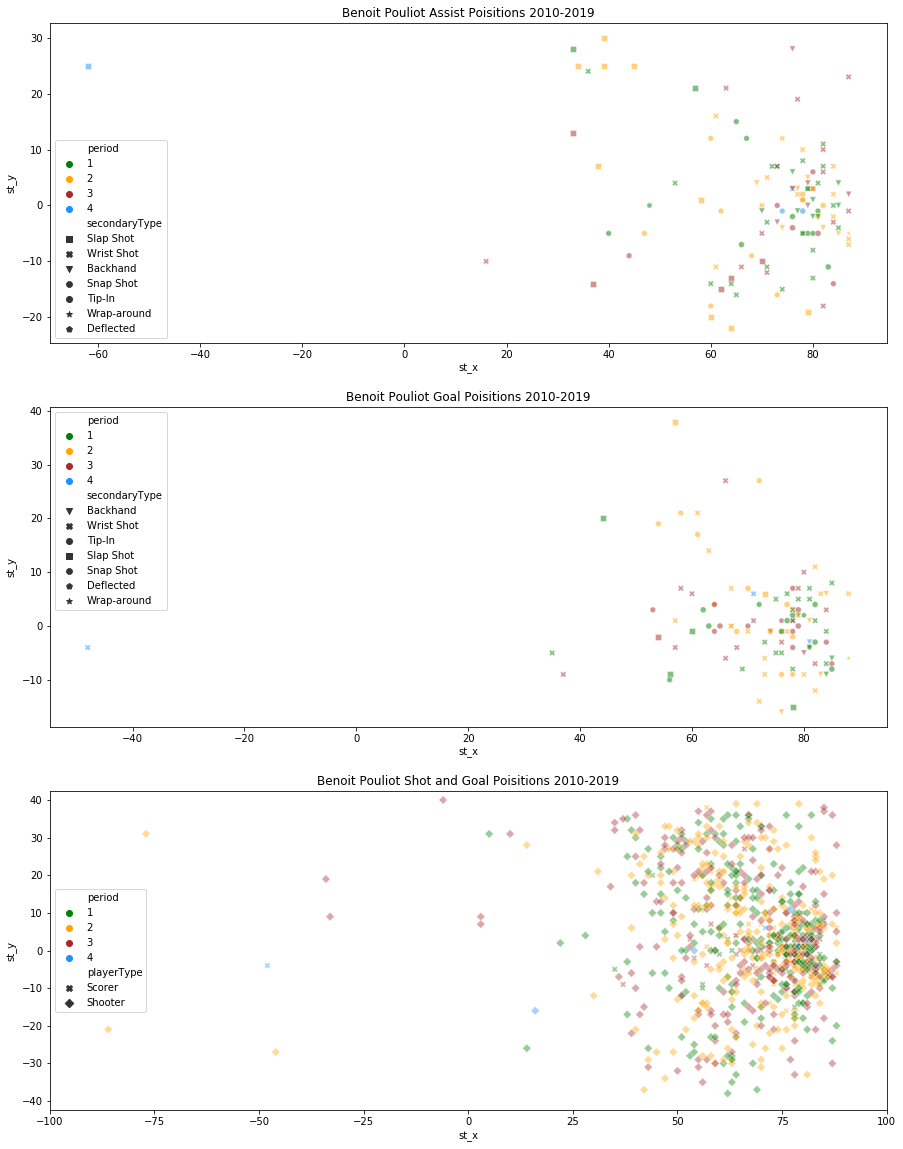

<Figure size 864x792 with 0 Axes>

In [31]:
f, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (15,20))
markers = {"Scorer" : "X", "Assist" : "o", "Shooter": "D"}
xdata = pouliot_goals_and_shots.st_x
ydata = pouliot_goals_and_shots.st_y
sns.scatterplot(x = xdata, y = ydata, style = "playerType", markers = markers, hue = "period", alpha = 0.4, data = pouliot_goals_and_shots, ax = ax3, palette= ['green','orange','brown','dodgerblue'])
ax3.set_xlim(-100,100)
ax3.set_ylim(-42.5, 42.5)


markers = {"Backhand": "v", "Deflected": "p", "Slap Shot": "s", "Snap Shot": "8", "Tip-In": "o", "Wrap-around": "*", "Wrist Shot": "X"  }
xdata = pouliot_goals.st_x
ydata = pouliot_goals.st_y
sns.scatterplot(x = xdata, y = ydata, style = "secondaryType", markers = markers, hue = "period", alpha = 0.5, data = pouliot_goals, ax = ax2, palette = ['green','orange','brown','dodgerblue'])

plt.figure(figsize=[12, 11])
xdata = pouliot_assists.st_x
ydata = pouliot_assists.st_y
ax = sns.scatterplot(x = xdata, y = ydata, style = "secondaryType", markers = markers, hue = "period", alpha = 0.5, data = pouliot_assists, ax  = ax1, palette = ['green','orange','brown','dodgerblue'])


ax1.title.set_text('Benoit Pouliot Assist Poisitions 2010-2019')
ax2.title.set_text('Benoit Pouliot Goal Poisitions 2010-2019')
ax3.title.set_text('Benoit Pouliot Shot and Goal Poisitions 2010-2019')


In [32]:
pouliot_pivot = pd.pivot_table(pouliot_points_and_shots, values = ['shot_flag'], index = 'period', columns = 'secondaryType', fill_value = 0)
pouliot_pivot



shot_flag                                                      \
secondaryType  Backhand Deflected Slap Shot Snap Shot    Tip-In Wrap-around   
period                                                                        
1              0.333333  0.571429  0.222222  0.183673  0.282051    0.000000   
2              0.268293  0.000000  0.244444  0.245614  0.232558    0.666667   
3              0.275862  0.083333  0.153846  0.220339  0.161290    0.000000   
4              1.000000  0.000000  0.500000  0.500000  1.000000    0.000000   

                          
secondaryType Wrist Shot  
period                    
1               0.241830  
2               0.196078  
3               0.219697  
4               0.428571

In [33]:
pouliot_period_averages = pouliot_pivot.iloc[0:3,].mean(axis = 1)
pouliot_shot_averages = pouliot_pivot.iloc[0:3,].mean(axis = 0)
print(pouliot_period_averages)
print(pouliot_shot_averages)


period
1    0.262077
2    0.264808
3    0.159195
dtype: float64
           secondaryType
shot_flag  Backhand         0.292496
           Deflected        0.218254
           Slap Shot        0.206838
           Snap Shot        0.216542
           Tip-In           0.225300
           Wrap-around      0.222222
           Wrist Shot       0.219202
dtype: float64


In [34]:
kane_plays = player_plays[player_plays['player_id'] == int(kane_id)]
kane_points = kane_plays.merge(all_goals, on = "play_id", how = "inner")
kane_goals = kane_points[kane_points['playerType'] == "Scorer"]
kane_assists = kane_points[kane_points['playerType'] == "Assist"]
kane_shots = kane_plays.merge(all_shots, on = "play_id", how = "inner")
kane_points_and_shots = pd.concat([kane_points, kane_shots])

kane_points_and_shots = kane_points_and_shots.merge(games,left_on = "game_id_x", right_on = "game_id", how = "inner"  )
kane_points = kane_points.merge(games, left_on = "game_id_x", right_on = "game_id", how = "inner")
kane_goals = kane_goals.merge(games, left_on = "game_id_x", right_on = "game_id", how = "inner")
kane_points_and_shots['shot_flag'] = np.where(kane_points_and_shots['event'] == "Shot", 0, 1)

kane_goals_and_shots = pd.concat([kane_goals, kane_shots], sort = False)


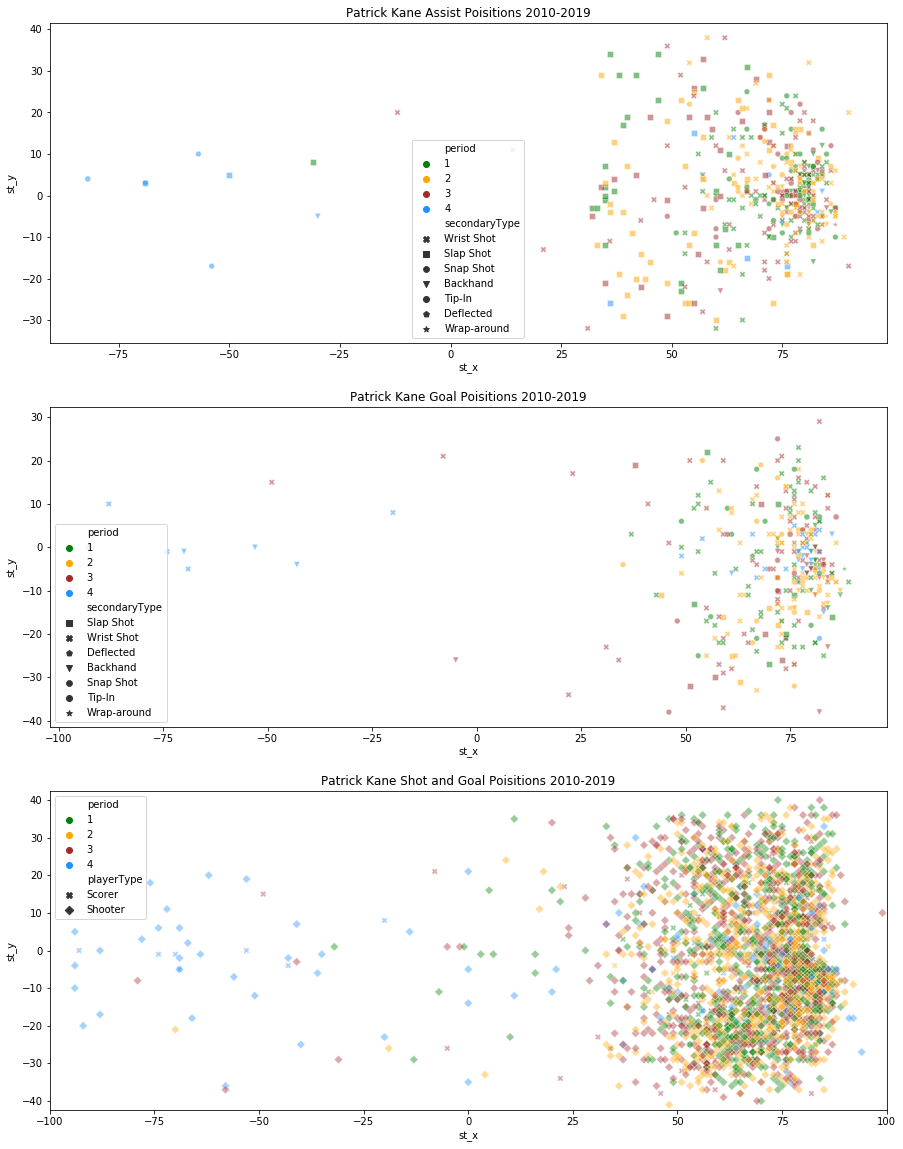

<Figure size 864x792 with 0 Axes>

In [35]:
f, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (15,20))
markers = {"Scorer" : "X", "Assist" : "o", "Shooter": "D"}
xdata = kane_goals_and_shots.st_x
ydata = kane_goals_and_shots.st_y
sns.scatterplot(x = xdata, y = ydata, style = "playerType", markers = markers, hue = "period", alpha = 0.4, data = kane_goals_and_shots, ax = ax3, palette= ['green','orange','brown','dodgerblue'])
ax3.set_xlim(-100,100)
ax3.set_ylim(-42.5, 42.5)


markers = {"Backhand": "v", "Deflected": "p", "Slap Shot": "s", "Snap Shot": "8", "Tip-In": "o", "Wrap-around": "*", "Wrist Shot": "X"  }
xdata = kane_goals.st_x
ydata = kane_goals.st_y
sns.scatterplot(x = xdata, y = ydata, style = "secondaryType", markers = markers, hue = "period", alpha = 0.5, data = kane_goals, ax = ax2, palette = ['green','orange','brown','dodgerblue'])

plt.figure(figsize=[12, 11])
xdata = kane_assists.st_x
ydata = kane_assists.st_y
ax = sns.scatterplot(x = xdata, y = ydata, style = "secondaryType", markers = markers, hue = "period", alpha = 0.5, data = kane_assists, ax  = ax1, palette = ['green','orange','brown','dodgerblue'])


ax1.title.set_text('Patrick Kane Assist Poisitions 2010-2019')
ax2.title.set_text('Patrick Kane Goal Poisitions 2010-2019')
ax3.title.set_text('Patrick Kane Shot and Goal Poisitions 2010-2019')



In [36]:

kane_pivot = pd.pivot_table(kane_points_and_shots, values = ['shot_flag'], index = 'period', columns = 'secondaryType', fill_value = 0)
kane_pivot


shot_flag                                                      \
secondaryType  Backhand Deflected Slap Shot Snap Shot    Tip-In Wrap-around   
period                                                                        
1              0.294118  0.600000  0.373626  0.285714  0.576923        0.25   
2              0.226415  0.636364  0.401460  0.292453  0.500000        0.20   
3              0.201754  0.142857  0.333333  0.289720  0.562500        0.25   
4              0.362069  0.000000  0.461538  0.400000  0.750000        0.00   

                          
secondaryType Wrist Shot  
period                    
1               0.223035  
2               0.226016  
3               0.234888  
4               0.234694

In [37]:
kane_period_averages = kane_pivot.iloc[0:3,].mean(axis = 1)
kane_shot_averages = kane_pivot.iloc[0:3,].mean(axis = 0)
print(kane_period_averages)
print(kane_shot_averages)


period
1    0.371917
2    0.354673
3    0.287865
dtype: float64
           secondaryType
shot_flag  Backhand         0.240762
           Deflected        0.459740
           Slap Shot        0.369473
           Snap Shot        0.289296
           Tip-In           0.546474
           Wrap-around      0.233333
           Wrist Shot       0.227980
dtype: float64


In [38]:
ward_plays = player_plays[player_plays['player_id'] == int(ward_id)]
ward_points = ward_plays.merge(all_goals, on = "play_id", how = "inner")
ward_goals = ward_points[ward_points['playerType'] == "Scorer"]
ward_assists = ward_points[ward_points['playerType'] == "Assist"]
ward_shots = ward_plays.merge(all_shots, on = "play_id", how = "inner")
ward_points_and_shots = pd.concat([ward_points, ward_shots])

ward_points_and_shots = ward_points_and_shots.merge(games,left_on = "game_id_x", right_on = "game_id", how = "inner"  )
ward_points = ward_points.merge(games, left_on = "game_id_x", right_on = "game_id", how = "inner")
ward_goals = ward_goals.merge(games, left_on = "game_id_x", right_on = "game_id", how = "inner")
ward_points_and_shots['shot_flag'] = np.where(ward_points_and_shots['event'] == "Shot", 0, 1)

ward_goals_and_shots = pd.concat([ward_goals, ward_shots], sort = False)


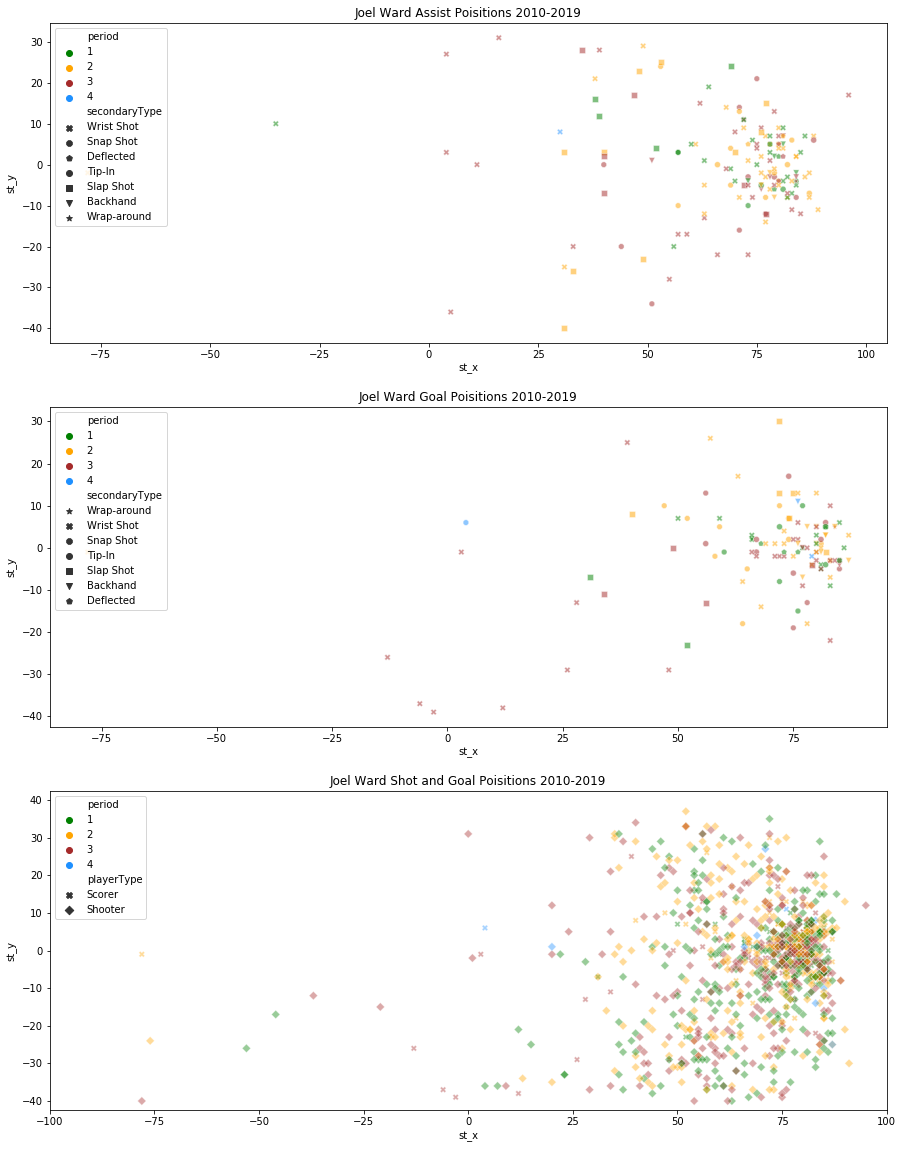

<Figure size 864x792 with 0 Axes>

In [39]:
f, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (15,20))
markers = {"Scorer" : "X", "Assist" : "o", "Shooter": "D"}
xdata = ward_goals_and_shots.st_x
ydata = ward_goals_and_shots.st_y
sns.scatterplot(x = xdata, y = ydata, style = "playerType", markers = markers, hue = "period", alpha = 0.4, data = ward_goals_and_shots, ax = ax3, palette= ['green','orange','brown','dodgerblue'])
ax3.set_xlim(-100,100)
ax3.set_ylim(-42.5, 42.5)


markers = {"Backhand": "v", "Deflected": "p", "Slap Shot": "s", "Snap Shot": "8", "Tip-In": "o", "Wrap-around": "*", "Wrist Shot": "X"  }
xdata = ward_goals.st_x
ydata = ward_goals.st_y
sns.scatterplot(x = xdata, y = ydata, style = "secondaryType", markers = markers, hue = "period", alpha = 0.5, data = ward_goals, ax = ax2, palette = ['green','orange','brown','dodgerblue'])

plt.figure(figsize=[12, 11])
xdata = ward_assists.st_x
ydata = ward_assists.st_y
ax = sns.scatterplot(x = xdata, y = ydata, style = "secondaryType", markers = markers, hue = "period", alpha = 0.5, data = ward_assists, ax  = ax1, palette = ['green','orange','brown','dodgerblue'])


ax1.title.set_text('Joel Ward Assist Poisitions 2010-2019')
ax2.title.set_text('Joel Ward Goal Poisitions 2010-2019')
ax3.title.set_text('Joel Ward Shot and Goal Poisitions 2010-2019')


In [40]:
ward_pivot = pd.pivot_table(ward_points_and_shots, values = ['shot_flag'], index = 'period', columns = 'secondaryType', fill_value = 0)
ward_pivot


shot_flag                                                      \
secondaryType  Backhand Deflected Slap Shot Snap Shot    Tip-In Wrap-around   
period                                                                        
1              0.172414  0.500000  0.139535  0.204082  0.156250         0.0   
2              0.406250  0.153846  0.340426  0.254545  0.242424         0.0   
3              0.189189  0.266667  0.153846  0.279070  0.294118         0.4   
4              0.500000  0.000000  0.000000  0.333333  0.000000         0.0   

                          
secondaryType Wrist Shot  
period                    
1               0.182320  
2               0.278075  
3               0.318436  
4               0.285714

In [41]:
ward_period_averages = ward_pivot.iloc[0:3,].mean(axis = 1)
ward_shot_averages = ward_pivot.iloc[0:3,].mean(axis = 0)
print(ward_period_averages)
print(ward_shot_averages)


period
1    0.193514
2    0.239367
3    0.271618
dtype: float64
           secondaryType
shot_flag  Backhand         0.255951
           Deflected        0.306838
           Slap Shot        0.211269
           Snap Shot        0.245899
           Tip-In           0.230931
           Wrap-around      0.133333
           Wrist Shot       0.259610
dtype: float64


In [42]:
karlsson_plays = player_plays[player_plays['player_id'] == int(karlsson_id)]
karlsson_points = karlsson_plays.merge(all_goals, on = "play_id", how = "inner")
karlsson_goals = karlsson_points[karlsson_points['playerType'] == "Scorer"]
karlsson_assists = karlsson_points[karlsson_points['playerType'] == "Assist"]
karlsson_shots = karlsson_plays.merge(all_shots, on = "play_id", how = "inner")
karlsson_points_and_shots = pd.concat([karlsson_points, karlsson_shots])

karlsson_points_and_shots = karlsson_points_and_shots.merge(games,left_on = "game_id_x", right_on = "game_id", how = "inner"  )
karlsson_points = karlsson_points.merge(games, left_on = "game_id_x", right_on = "game_id", how = "inner")
karlsson_goals = karlsson_goals.merge(games, left_on = "game_id_x", right_on = "game_id", how = "inner")
karlsson_points_and_shots['shot_flag'] = np.where(karlsson_points_and_shots['event'] == "Shot", 0, 1)

karlsson_goals_and_shots = pd.concat([karlsson_goals, karlsson_shots], sort = False)


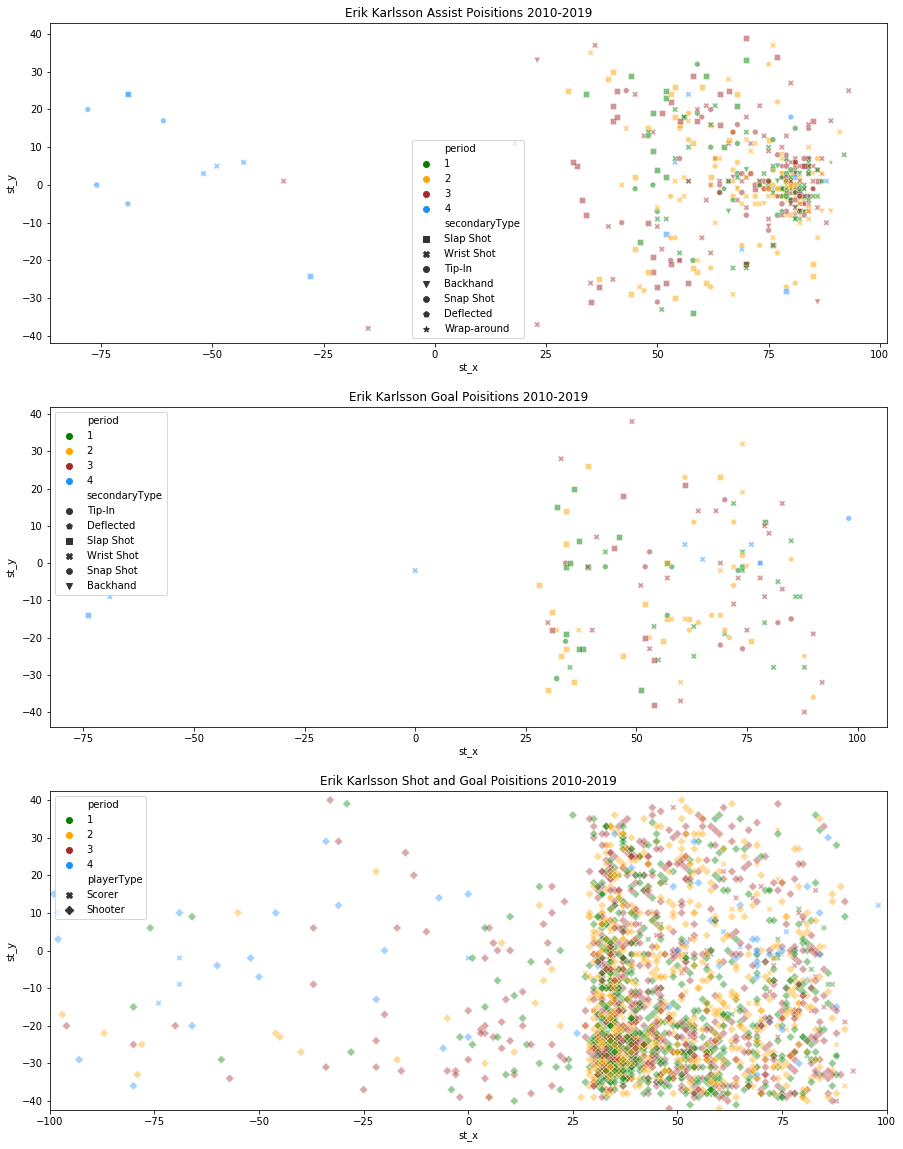

<Figure size 864x792 with 0 Axes>

In [43]:
f, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (15,20))
markers = {"Scorer" : "X", "Assist" : "o", "Shooter": "D"}
xdata = karlsson_goals_and_shots.st_x
ydata = karlsson_goals_and_shots.st_y
sns.scatterplot(x = xdata, y = ydata, style = "playerType", markers = markers, hue = "period", alpha = 0.4, data = karlsson_goals_and_shots, ax = ax3, palette= ['green','orange','brown','dodgerblue'])
ax3.set_xlim(-100,100)
ax3.set_ylim(-42.5, 42.5)


markers = {"Backhand": "v", "Deflected": "p", "Slap Shot": "s", "Snap Shot": "8", "Tip-In": "o", "Wrap-around": "*", "Wrist Shot": "X"  }
xdata = karlsson_goals.st_x
ydata = karlsson_goals.st_y
sns.scatterplot(x = xdata, y = ydata, style = "secondaryType", markers = markers, hue = "period", alpha = 0.5, data = karlsson_goals, ax = ax2, palette = ['green','orange','brown','dodgerblue'])

plt.figure(figsize=[12, 11])
xdata = karlsson_assists.st_x
ydata = karlsson_assists.st_y
ax = sns.scatterplot(x = xdata, y = ydata, style = "secondaryType", markers = markers, hue = "period", alpha = 0.5, data = karlsson_assists, ax  = ax1, palette = ['green','orange','brown','dodgerblue'])


ax1.title.set_text('Erik Karlsson Assist Poisitions 2010-2019')
ax2.title.set_text('Erik Karlsson Goal Poisitions 2010-2019')
ax3.title.set_text('Erik Karlsson Shot and Goal Poisitions 2010-2019')


In [44]:
karlsson_pivot = pd.pivot_table(karlsson_points_and_shots, values = ['shot_flag'], index = 'period', columns = 'secondaryType', fill_value = 0)
karlsson_pivot


shot_flag                                                      \
secondaryType  Backhand Deflected Slap Shot Snap Shot    Tip-In Wrap-around   
period                                                                        
1              0.625000  0.909091  0.118577  0.204819  0.714286         1.0   
2              0.600000  0.888889  0.151408  0.245902  0.954545         0.0   
3              0.458333  1.000000  0.143369  0.270270  0.851852         0.5   
4              0.000000  0.000000  0.312500  0.272727  1.000000         0.0   

                          
secondaryType Wrist Shot  
period                    
1               0.180556  
2               0.166667  
3               0.240106  
4               0.400000

In [45]:
karlsson_period_averages = karlsson_pivot.iloc[0:3,].mean(axis = 1)
karlsson_shot_averages = karlsson_pivot.iloc[0:3,].mean(axis = 0)
print(karlsson_period_averages)
print(karlsson_shot_averages)


period
1    0.536047
2    0.429630
3    0.494847
dtype: float64
           secondaryType
shot_flag  Backhand         0.561111
           Deflected        0.932660
           Slap Shot        0.137785
           Snap Shot        0.240330
           Tip-In           0.840228
           Wrap-around      0.500000
           Wrist Shot       0.195776
dtype: float64


In [46]:
greene_plays = player_plays[player_plays['player_id'] == int(greene_id)]
greene_points = greene_plays.merge(all_goals, on = "play_id", how = "inner")
greene_goals = greene_points[greene_points['playerType'] == "Scorer"]
greene_assists = greene_points[greene_points['playerType'] == "Assist"]
greene_shots = greene_plays.merge(all_shots, on = "play_id", how = "inner")
greene_points_and_shots = pd.concat([greene_points, greene_shots])

greene_points_and_shots = greene_points_and_shots.merge(games,left_on = "game_id_x", right_on = "game_id", how = "inner"  )
greene_points = greene_points.merge(games, left_on = "game_id_x", right_on = "game_id", how = "inner")
greene_goals = greene_goals.merge(games, left_on = "game_id_x", right_on = "game_id", how = "inner")
greene_points_and_shots['shot_flag'] = np.where(greene_points_and_shots['event'] == "Shot", 0, 1)

greene_goals_and_shots = pd.concat([greene_goals, greene_shots], sort = False)


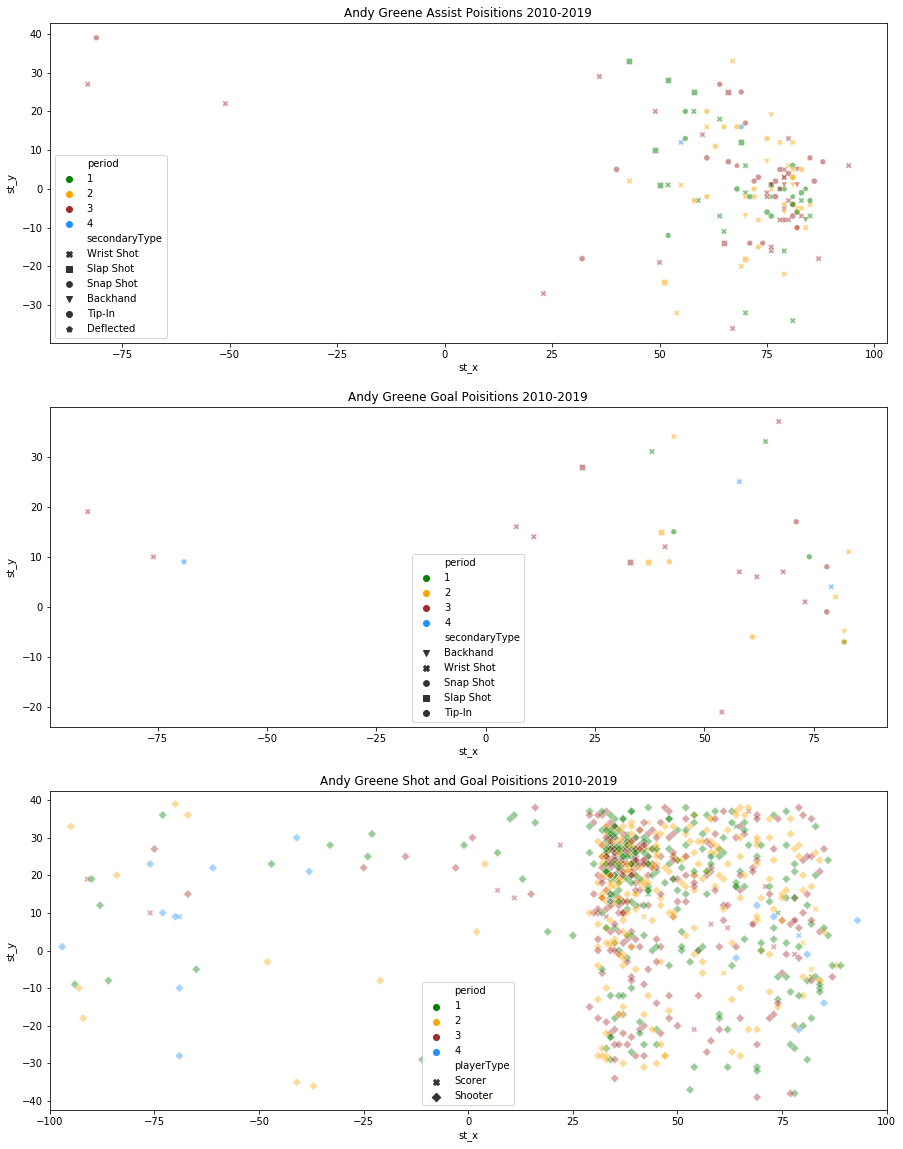

<Figure size 864x792 with 0 Axes>

In [47]:
f, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (15,20))
markers = {"Scorer" : "X", "Assist" : "o", "Shooter": "D"}
xdata = greene_goals_and_shots.st_x
ydata = greene_goals_and_shots.st_y
sns.scatterplot(x = xdata, y = ydata, style = "playerType", markers = markers, hue = "period", alpha = 0.4, data = greene_goals_and_shots, ax = ax3, palette= ['green','orange','brown','dodgerblue'])
ax3.set_xlim(-100,100)
ax3.set_ylim(-42.5, 42.5)


markers = {"Backhand": "v", "Deflected": "p", "Slap Shot": "s", "Snap Shot": "8", "Tip-In": "o", "Wrap-around": "*", "Wrist Shot": "X"  }
xdata = greene_goals.st_x
ydata = greene_goals.st_y
sns.scatterplot(x = xdata, y = ydata, style = "secondaryType", markers = markers, hue = "period", alpha = 0.5, data = greene_goals, ax = ax2, palette = ['green','orange','brown','dodgerblue'])

plt.figure(figsize=[12, 11])
xdata = greene_assists.st_x
ydata = greene_assists.st_y
ax = sns.scatterplot(x = xdata, y = ydata, style = "secondaryType", markers = markers, hue = "period", alpha = 0.5, data = greene_assists, ax  = ax1, palette = ['green','orange','brown','dodgerblue'])


ax1.title.set_text('Andy Greene Assist Poisitions 2010-2019')
ax2.title.set_text('Andy Greene Goal Poisitions 2010-2019')
ax3.title.set_text('Andy Greene Shot and Goal Poisitions 2010-2019')


In [48]:
greene_pivot = pd.pivot_table(greene_points_and_shots, values = ['shot_flag'], index = 'period', columns = 'secondaryType', fill_value = 0)
greene_pivot


shot_flag                                                      \
secondaryType  Backhand Deflected Slap Shot Snap Shot    Tip-In Wrap-around   
period                                                                        
1              0.076923       1.0  0.063830  0.134328  0.727273           0   
2              0.600000       0.5  0.050633  0.175676  0.666667           0   
3              1.000000       0.4  0.036697  0.215385  0.857143           0   
4              0.000000       0.0  0.000000  0.200000  0.000000           0   

                          
secondaryType Wrist Shot  
period                    
1               0.165049  
2               0.193277  
3               0.312500  
4               0.333333

In [49]:
greene_period_averages = greene_pivot.iloc[0:3,].mean(axis = 1)
greene_shot_averages = greene_pivot.iloc[0:3,].mean(axis = 0)
print(greene_period_averages)
print(greene_shot_averages)



period
1    0.309629
2    0.312322
3    0.403104
dtype: float64
           secondaryType
shot_flag  Backhand         0.558974
           Deflected        0.633333
           Slap Shot        0.050387
           Snap Shot        0.175130
           Tip-In           0.750361
           Wrap-around      0.000000
           Wrist Shot       0.223609
dtype: float64


In [50]:
girardi_plays = player_plays[player_plays['player_id'] == int(girardi_id)]
girardi_points = girardi_plays.merge(all_goals, on = "play_id", how = "inner")
girardi_goals = girardi_points[girardi_points['playerType'] == "Scorer"]
girardi_assists = girardi_points[girardi_points['playerType'] == "Assist"]
girardi_shots = girardi_plays.merge(all_shots, on = "play_id", how = "inner")
girardi_points_and_shots = pd.concat([girardi_points, girardi_shots])

girardi_points_and_shots = girardi_points_and_shots.merge(games,left_on = "game_id_x", right_on = "game_id", how = "inner"  )
girardi_points = girardi_points.merge(games, left_on = "game_id_x", right_on = "game_id", how = "inner")
girardi_goals = girardi_goals.merge(games, left_on = "game_id_x", right_on = "game_id", how = "inner")
girardi_points_and_shots['shot_flag'] = np.where(girardi_points_and_shots['event'] == "Shot", 0, 1)

girardi_goals_and_shots = pd.concat([girardi_goals, girardi_shots], sort = False)


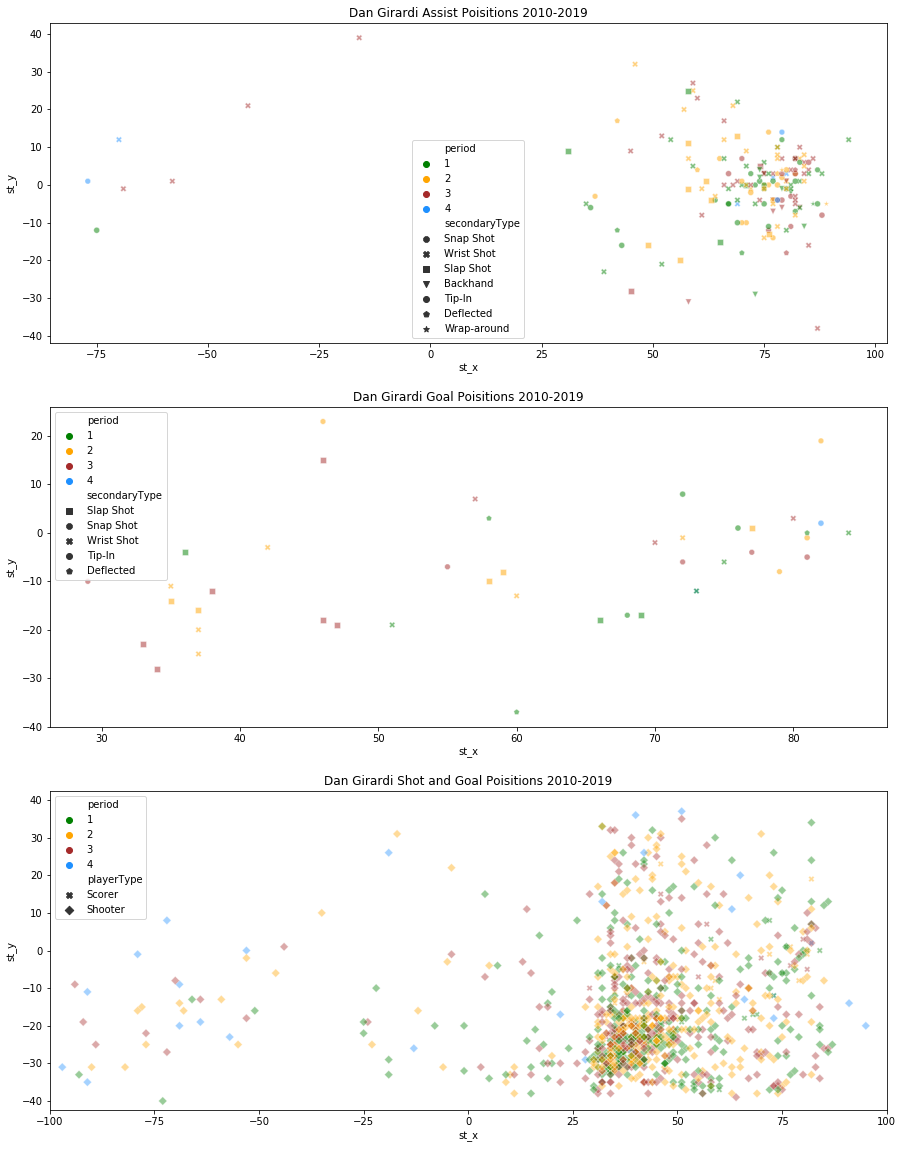

<Figure size 864x792 with 0 Axes>

In [51]:
f, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (15,20))
markers = {"Scorer" : "X", "Assist" : "o", "Shooter": "D"}
xdata = girardi_goals_and_shots.st_x
ydata = girardi_goals_and_shots.st_y
sns.scatterplot(x = xdata, y = ydata, style = "playerType", markers = markers, hue = "period", alpha = 0.4, data = girardi_goals_and_shots, ax = ax3, palette= ['green','orange','brown','dodgerblue'])
ax3.set_xlim(-100,100)
ax3.set_ylim(-42.5, 42.5)


markers = {"Backhand": "v", "Deflected": "p", "Slap Shot": "s", "Snap Shot": "8", "Tip-In": "o", "Wrap-around": "*", "Wrist Shot": "X"  }
xdata = girardi_goals.st_x
ydata = girardi_goals.st_y
sns.scatterplot(x = xdata, y = ydata, style = "secondaryType", markers = markers, hue = "period", alpha = 0.5, data = girardi_goals, ax = ax2, palette = ['green','orange','brown','dodgerblue'])

plt.figure(figsize=[12, 11])
xdata = girardi_assists.st_x
ydata = girardi_assists.st_y
ax = sns.scatterplot(x = xdata, y = ydata, style = "secondaryType", markers = markers, hue = "period", alpha = 0.5, data = girardi_assists, ax  = ax1, palette = ['green','orange','brown','dodgerblue'])


ax1.title.set_text('Dan Girardi Assist Poisitions 2010-2019')
ax2.title.set_text('Dan Girardi Goal Poisitions 2010-2019')
ax3.title.set_text('Dan Girardi Shot and Goal Poisitions 2010-2019')


In [52]:
girardi_pivot = pd.pivot_table(girardi_points_and_shots, values = ['shot_flag'], index = 'period', columns = 'secondaryType', fill_value = 0)
girardi_pivot

shot_flag                                                      \
secondaryType  Backhand Deflected Slap Shot Snap Shot    Tip-In Wrap-around   
period                                                                        
1                 0.600  0.833333  0.052632  0.256410  0.875000           1   
2                 0.000  1.000000  0.073864  0.255319  0.777778           1   
3                 0.875  1.000000  0.057554  0.190476  0.818182           0   
4                 0.000  0.000000  0.000000  0.500000  1.000000           0   

                          
secondaryType Wrist Shot  
period                    
1               0.192308  
2               0.206667  
3               0.224490  
4               0.416667

In [53]:
girardi_period_averages = girardi_pivot.iloc[0:3,].mean(axis = 1)
girardi_shot_averages = girardi_pivot.iloc[0:3,].mean(axis = 0)
print(girardi_period_averages)
print(girardi_shot_averages)

period
1    0.544240
2    0.473375
3    0.452243
dtype: float64
           secondaryType
shot_flag  Backhand         0.491667
           Deflected        0.944444
           Slap Shot        0.061350
           Snap Shot        0.234069
           Tip-In           0.823653
           Wrap-around      0.666667
           Wrist Shot       0.207821
dtype: float64


In [54]:
letang_plays = player_plays[player_plays['player_id'] == int(letang_id)]
letang_points = letang_plays.merge(all_goals, on = "play_id", how = "inner")
letang_goals = letang_points[letang_points['playerType'] == "Scorer"]
letang_assists = letang_points[letang_points['playerType'] == "Assist"]
letang_shots = letang_plays.merge(all_shots, on = "play_id", how = "inner")
letang_points_and_shots = pd.concat([letang_points, letang_shots])

letang_points_and_shots = letang_points_and_shots.merge(games,left_on = "game_id_x", right_on = "game_id", how = "inner"  )
letang_points = letang_points.merge(games, left_on = "game_id_x", right_on = "game_id", how = "inner")
letang_goals = letang_goals.merge(games, left_on = "game_id_x", right_on = "game_id", how = "inner")
letang_points_and_shots['shot_flag'] = np.where(letang_points_and_shots['event'] == "Shot", 0, 1)

letang_goals_and_shots = pd.concat([letang_goals, letang_shots], sort = False)


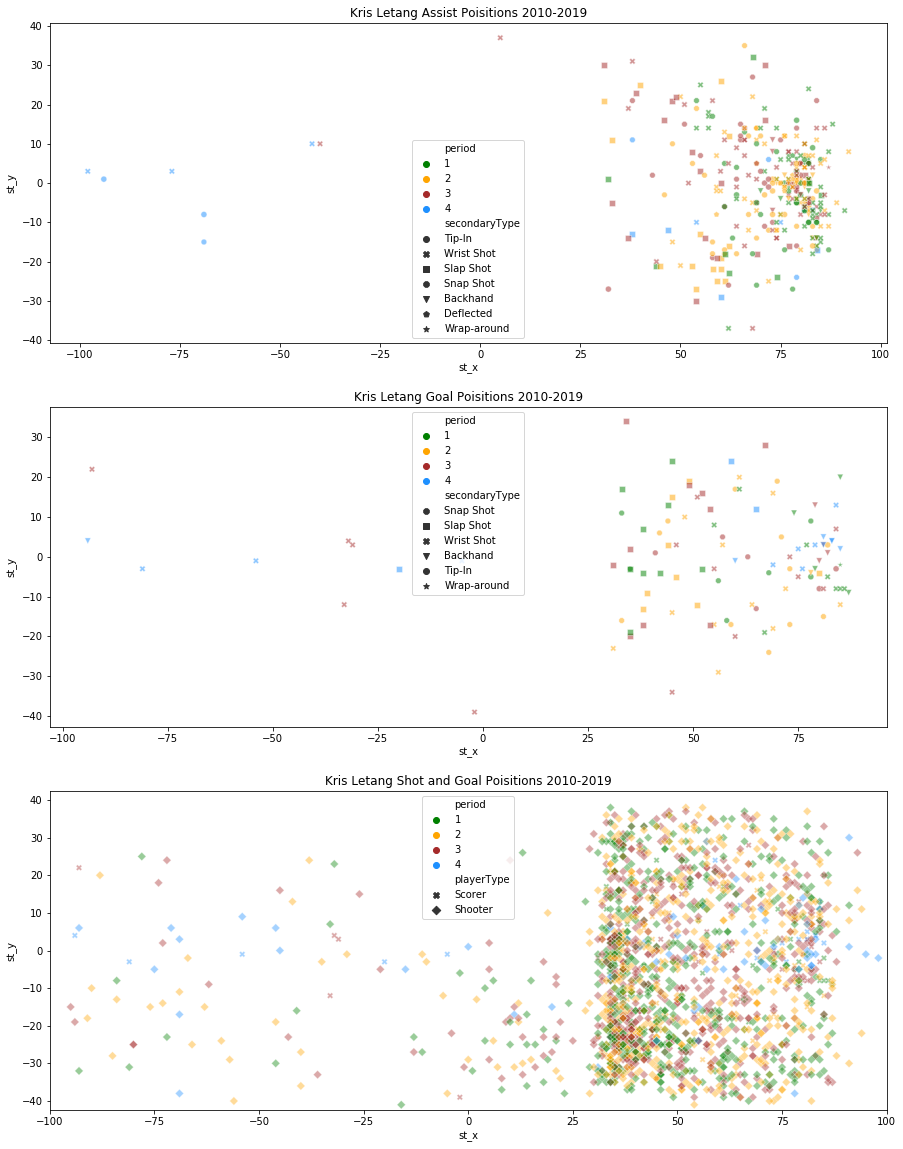

<Figure size 864x792 with 0 Axes>

In [55]:
f, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (15,20))
markers = {"Scorer" : "X", "Assist" : "o", "Shooter": "D"}
xdata = letang_goals_and_shots.st_x
ydata = letang_goals_and_shots.st_y
sns.scatterplot(x = xdata, y = ydata, style = "playerType", markers = markers, hue = "period", alpha = 0.4, data = letang_goals_and_shots, ax = ax3, palette= ['green','orange','brown','dodgerblue'])
ax3.set_xlim(-100,100)
ax3.set_ylim(-42.5, 42.5)


markers = {"Backhand": "v", "Deflected": "p", "Slap Shot": "s", "Snap Shot": "8", "Tip-In": "o", "Wrap-around": "*", "Wrist Shot": "X"  }
xdata = letang_goals.st_x
ydata = letang_goals.st_y
sns.scatterplot(x = xdata, y = ydata, style = "secondaryType", markers = markers, hue = "period", alpha = 0.5, data = letang_goals, ax = ax2, palette = ['green','orange','brown','dodgerblue'])

plt.figure(figsize=[12, 11])
xdata = letang_assists.st_x
ydata = letang_assists.st_y
ax = sns.scatterplot(x = xdata, y = ydata, style = "secondaryType", markers = markers, hue = "period", alpha = 0.5, data = letang_assists, ax  = ax1, palette = ['green','orange','brown','dodgerblue'])


ax1.title.set_text('Kris Letang Assist Poisitions 2010-2019')
ax2.title.set_text('Kris Letang Goal Poisitions 2010-2019')
ax3.title.set_text('Kris Letang Shot and Goal Poisitions 2010-2019')



In [56]:
letang_pivot = pd.pivot_table(letang_points_and_shots, values = ['shot_flag'], index = 'period', columns = 'secondaryType', fill_value = 0)
letang_pivot



shot_flag                                                      \
secondaryType  Backhand Deflected Slap Shot Snap Shot    Tip-In Wrap-around   
period                                                                        
1              0.307692      0.25  0.093407  0.195312  0.857143    1.000000   
2              0.342105      1.00  0.123656  0.272059  0.782609    0.000000   
3              0.243243      0.50  0.145078  0.201681  0.900000    0.666667   
4              0.400000      0.00  0.411765  0.307692  1.000000    0.000000   

                          
secondaryType Wrist Shot  
period                    
1               0.209059  
2               0.211356  
3               0.209150  
4               0.265306

In [57]:
letang_period_averages = letang_pivot.iloc[0:3,].mean(axis = 1)
letang_shot_averages = letang_pivot.iloc[0:3,].mean(axis = 0)
print(letang_period_averages)
print(letang_shot_averages)

period
1    0.416088
2    0.390255
3    0.409403
dtype: float64
           secondaryType
shot_flag  Backhand         0.297680
           Deflected        0.583333
           Slap Shot        0.120713
           Snap Shot        0.223017
           Tip-In           0.846584
           Wrap-around      0.555556
           Wrist Shot       0.209855
dtype: float64


In [58]:
letang_plays = player_plays[player_plays['player_id'] == int(letang_id)]
letang_points = letang_plays.merge(all_goals, on = "play_id", how = "inner")
letang_goals = letang_points[letang_points['playerType'] == "Scorer"]
letang_assists = letang_points[letang_points['playerType'] == "Assist"]
letang_shots = letang_plays.merge(all_shots, on = "play_id", how = "inner")
letang_points_and_shots = pd.concat([letang_points, letang_shots])

letang_points_and_shots = letang_points_and_shots.merge(games,left_on = "game_id_x", right_on = "game_id", how = "inner"  )
letang_points = letang_points.merge(games, left_on = "game_id_x", right_on = "game_id", how = "inner")
letang_goals = letang_goals.merge(games, left_on = "game_id_x", right_on = "game_id", how = "inner")
letang_points_and_shots['shot_flag'] = np.where(letang_points_and_shots['event'] == "Shot", 0, 1)

letang_goals_and_shots = pd.concat([letang_goals, letang_shots], sort = False)




In [59]:
player_plays.head()
players.head()

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,link
0,8467412,Alexei,Ponikarovsky,UKR,Kiev,LW,1980-04-09,/api/v1/people/8467412
1,8468501,Anton,Volchenkov,RUS,Moscow,D,1982-02-25,/api/v1/people/8468501
2,8459670,Kimmo,Timonen,FIN,Kuopio,D,1975-03-18,/api/v1/people/8459670
3,8471233,Travis,Zajac,CAN,Winnipeg,C,1985-05-13,/api/v1/people/8471233
4,8455710,Martin,Brodeur,CAN,Montreal,G,1972-05-06,/api/v1/people/8455710


In [60]:
defensemen_ids = players[players['primaryPosition'] == "D"]

defensemen_ids = defensemen_ids.loc[:,'player_id':'firstName']
defensemen_ids.head()

,player_id,firstName
1,8468501,Anton
2,8459670,Kimmo
5,8475640,Erik
10,8468534,Andreas
15,8476457,Adam


In [66]:
top_6_pivots = crosby_pivot+ ovechkin_pivot + kane_pivot + mcDavid_pivot + karlsson_pivot + letang_pivot

In [69]:
top_6_pivots_average = top_6_pivots/6
top_6_pivots_average 

shot_flag                                                      \
secondaryType  Backhand Deflected Slap Shot Snap Shot    Tip-In Wrap-around   
period                                                                        
1              0.315289  0.511526  0.277859  0.243937  0.561145    0.475000   
2              0.310942  0.656987  0.260874  0.289877  0.656165    0.088889   
3              0.248939  0.468717  0.322238  0.282158  0.603979    0.273148   
4              0.320815  0.166667  0.440155  0.384456  0.638889    0.000000   

                          
secondaryType Wrist Shot  
period                    
1               0.224946  
2               0.231284  
3               0.254778  
4               0.299279

In [74]:
average_6_pivots = girardi_pivot + greene_pivot + eakin_pivot + tierney_pivot + ward_pivot + pouliot_pivot
average_6_pivots_average = average_6_pivots/6
average_6_pivots_average

shot_flag                                                      \
secondaryType  Backhand Deflected Slap Shot Snap Shot    Tip-In Wrap-around   
period                                                                        
1              0.262965  0.581349  0.132481  0.235889  0.439024    0.200000   
2              0.274237  0.421096  0.246590  0.231647  0.433194    0.361111   
3              0.470817  0.458333  0.181168  0.290352  0.441233    0.087500   
4              0.305556  0.000000  0.083333  0.477778  0.333333    0.000000   

                          
secondaryType Wrist Shot  
period                    
1               0.190380  
2               0.225643  
3               0.271308  
4               0.312500

In [76]:
average_diff = top_6_pivots_average - average_6_pivots_average
average_diff

shot_flag                                                      \
secondaryType  Backhand Deflected Slap Shot Snap Shot    Tip-In Wrap-around   
period                                                                        
1              0.052324 -0.069823  0.145378  0.008048  0.122122    0.275000   
2              0.036705  0.235891  0.014284  0.058229  0.222970   -0.272222   
3             -0.221877  0.010384  0.141069 -0.008194  0.162746    0.185648   
4              0.015259  0.166667  0.356822 -0.093322  0.305556    0.000000   

                          
secondaryType Wrist Shot  
period                    
1               0.034566  
2               0.005641  
3              -0.016530  
4              -0.013221

In [82]:
average_diff.sum(axis = 0)
average_diff.sum(axis = 1)

period
1    0.567615
2    0.301498
3    0.253246
4    0.737761
dtype: float64